## Titanic

In [87]:
# import some important library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
# Load Titanic Dataset

df = pd.read_csv('data/train.csv')

In [89]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
df.shape

(891, 12)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Fill Null values

In [92]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

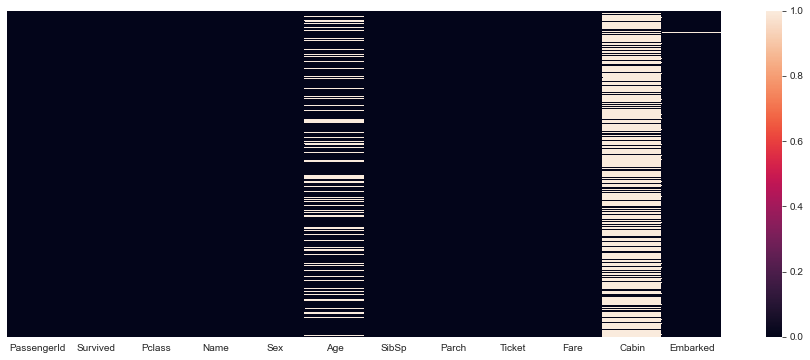

In [93]:
# visualize null values with headmap

plt.rcParams['figure.figsize'] = (16, 6)
sns.heatmap(df.isnull(), yticklabels=False);

In [95]:
# Fill age with average value (according to Pclass)

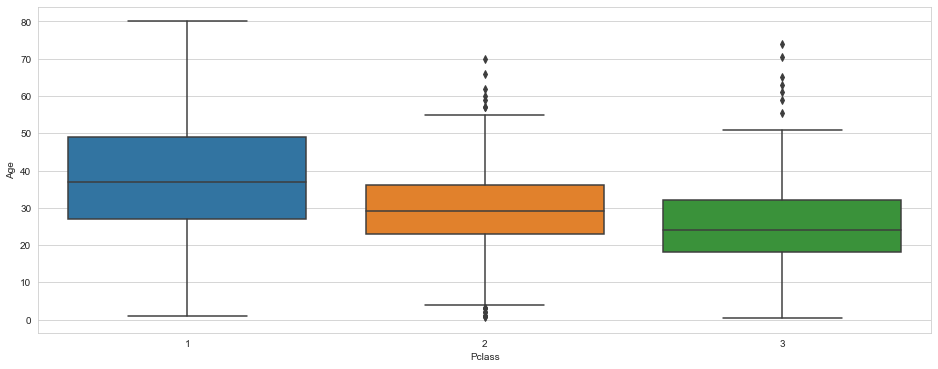

In [96]:
sns.boxplot(x='Pclass', y='Age', data=df);

In [98]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
        
    else:
        return Age

In [99]:
df['Age'] = df[['Age', 'Pclass']].apply(fill_age, axis=1)

In [100]:
df['Age'].isnull().sum()

0

In [101]:
# Cabin

df['Cabin'].isnull().sum()

687

In [102]:
# There is lots of null value in Cabin so Dropping the column

df.drop('Cabin', axis=1, inplace=True)

In [103]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [104]:
# Embarked

df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [105]:
df['Embarked'].mode()

0    S
dtype: object

In [106]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [107]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [108]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


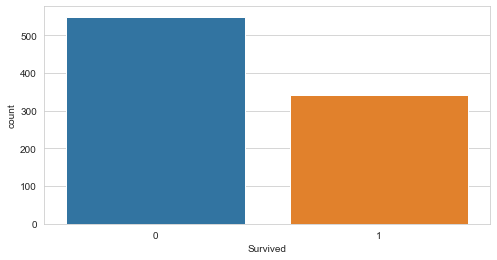

In [109]:
# Survive

plt.rcParams['figure.figsize'] = (8, 4)
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df);

## Observations

1. Around 550 people did not Survive.

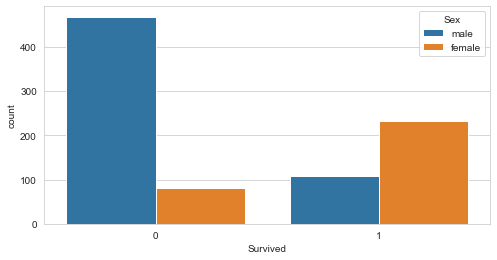

In [110]:
# Survive people gender wise.

sns.countplot(x='Survived', data=df, hue='Sex');

## Observations

1. More Female survived than Male.
2. More Male did not survive.

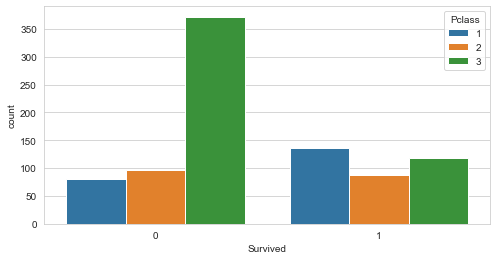

In [111]:
# Survive people with Pclass

sns.countplot(x='Survived', hue='Pclass', data=df);

## Observations

1. Most of the people who did not survive from Pclass 3.
2. Most of the people who survive belogs to Pclass 1. 

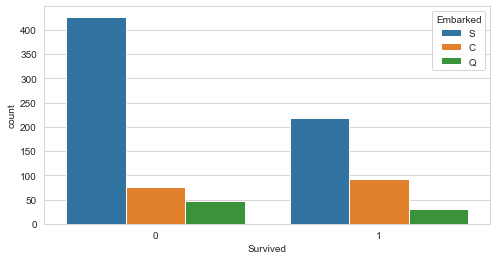

In [112]:
# Survive with Embarked

sns.countplot(x='Survived', hue='Embarked', data=df);

## Observations

1. Most people who did not survive Embarked from S (Southampton)
2. Most people sevived who Embarked from S (Southampton)
3. Very less people survived who Embarked from Q (Queenstown)

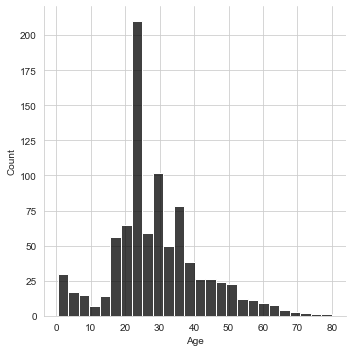

In [121]:
sns.displot(df['Age'], color='black');

## Observation
1. Maximum people were 20-40 age range.

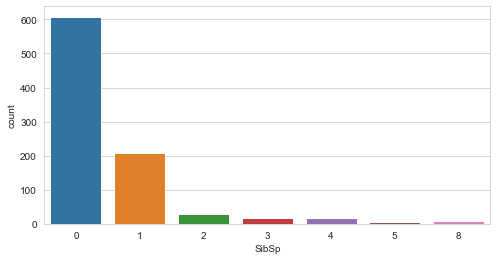

In [82]:
sns.countplot(x='SibSp', data=df);

## Observation
1. Maximum people did not sibling or Spouse

## Categorical Features

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [123]:
# Categorical feature Sex

df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [126]:
df['Sex'] = df['Sex'].map({'female': 1, 'male': 0})

In [127]:
df['Sex'] = df['Sex'].astype(int)

In [133]:
df['Sex'].dtype

dtype('int32')

In [141]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [146]:
embark = pd.get_dummies(df['Embarked'], drop_first=True)

In [148]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [157]:
df = pd.concat([df, embark], axis=1)

In [158]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,0,0


In [162]:
# Drop Name, Ticket, Embarked column

df.drop(['Name', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [163]:
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,1,0,3,0,22.0,1,0,7.2500,0,1
1,2,1,1,1,38.0,1,0,71.2833,0,0


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Q            891 non-null    uint8  
 9   S            891 non-null    uint8  
dtypes: float64(2), int32(1), int64(5), uint8(2)
memory usage: 54.1 KB


In [165]:
df['Q'] = df['Q'].astype(int)
df['S'] = df['S'].astype(int)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Q            891 non-null    int32  
 9   S            891 non-null    int32  
dtypes: float64(2), int32(3), int64(5)
memory usage: 59.3 KB
